<a href="https://colab.research.google.com/github/gprabhat65/Crop-Recommendation-System/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Load the dataset
crop = pd.read_csv("/content/drive/MyDrive/Crop_recommendation.csv")

In [ ]:
# Display the first few rows of the dataset
print(crop.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# Display the shape of the dataset
print(crop.shape)

(2200, 8)


In [ ]:
# Display information about the dataset
print(crop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
# Check for missing values in the dataset
print(crop.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Check for duplicated rows in the dataset
print(crop.duplicated().sum())

0


In [ ]:
# Display summary statistics of the dataset
print(crop.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [ ]:
# Display the distribution of crop labels
print(crop['label'].value_counts())


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


<ipython-input-10-f4132f811637>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


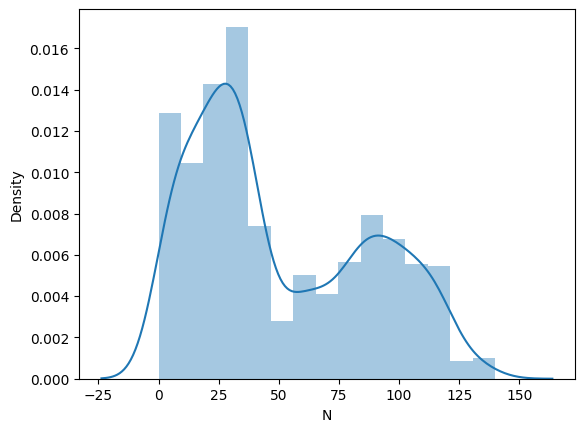

In [ ]:
# Plot the distribution of the 'N' feature
sns.distplot(crop['N'])
plt.show()

In [ ]:
# Separate the features (X) and the target (y)
x = crop.drop('label', axis=1)        #Dependent
y = crop['label']                     #Independent

In [ ]:
# Display the features and target
print(x.head())
print(y.head())


    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with a scaler and a RandomForest classifier
steps = [
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('classifier', RandomForestClassifier())  # Step 2: Classification with RandomForest
]
pipeline = Pipeline(steps)


In [ ]:
# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Function to recommend crop based on input features
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = pipeline.predict(features)
    return prediction[0]

In [ ]:
# Model evaluation
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.32%


In [ ]:
# Example usage of the recommendation function
N = 50
P = 50
K = 50
temperature = 25
humidity = 85
ph = 6.52
rainfall = 85.324

# Predict the crop recommendation
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)
print(predict)

papaya


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Save the trained pipeline model
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [ ]:
# Verify prediction works outside Flask route
# Load the model
pipeline = joblib.load('pipeline.pkl')

In [ ]:
# Example prediction
features = np.array([[78, 85, 52, 45, 85, 6, 45]])
prediction = pipeline.predict(features)
print(prediction[0])

banana


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import Statements: Consolidated all import statements at the top.
# Dataset Loading: Added a print statement to show the first few rows of the dataset for verification.
# Data Analysis: Retained essential data analysis steps like shape, info, missing values, duplicates, and statistical summary. Added print statements for better readability.
# Plotting: Retained the seaborn plot for visualizing the distribution of 'N'.
# Data Splitting: Split the dataset into features (X) and target (y) and then into training and testing sets.
# Pipeline Creation and Training: Created and trained a pipeline that includes scaling and classification.
# Recommendation Function: Added a function to make predictions based on input features.
# Example Usage: Provided an example of how to use the recommendation function.
# Model Saving: Used joblib to save the trained pipeline.
# Model Loading and Verification: Demonstrated how to load the model and verify it with an example prediction.
# Removed Redundancy: Removed unnecessary lines of code and comments, especially those related to checking predictions in a loop and saving the model with pickle, which were redundant given the use of joblib.